In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [68]:
# root_file = '/home/dhasade/audits/ml-audits/results/german_credit/merged_german_credit_stratified_n2.csv'
# root_file = '/home/dhasade/audits/ml-audits/results/propublica/merged_propublica_stratified_n2.csv'
root_file = '/home/dhasade/audits/ml-audits/results/folktables/merged_folktables_stratified_n2.csv'

In [69]:
df = pd.read_csv(root_file)

In [70]:
collaboration_map = {
    'none': 'No Collab.',
    'apriori (unbiased)': 'Apriori',
    'aposteriori' : 'Aposteriori'
}

In [71]:
aggregated_df = df.groupby(['budget', 'dataset', 'collaboration', 'sample', 'agent', 'attribute'])['dp_error'].mean().reset_index()

# get separate dataframes for each agent
agent0_df = aggregated_df[aggregated_df['agent'] == 0] # age
agent1_df = aggregated_df[aggregated_df['agent'] == 1] # sex

In [72]:
aggregated_df.head()

,budget,dataset,collaboration,sample,agent,attribute,dp_error
0,100,folktables,aposteriori,stratified,0,SEX,0.038720
1,100,folktables,aposteriori,stratified,1,MAR,0.048481
2,100,folktables,apriori (unbiased),stratified,0,SEX,0.036308
3,100,folktables,apriori (unbiased),stratified,1,MAR,0.050059
4,100,folktables,none,stratified,0,SEX,0.052875


In [73]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   # 'figure.figsize': [1.3, 1.1],
   'figure.figsize': [3.2, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)


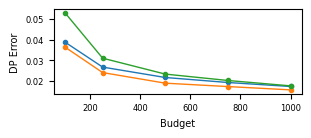

In [74]:
# Plot separately for each agent
# Agent 0: Age

# Plot budget vs. error, grouped by collaboration column
for collaboration, group in agent0_df.groupby('collaboration'):
    plt.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

plt.ylabel('DP Error')
plt.xlabel('Budget')
# plt.legend()

# save plot to file
plot_name = 'gc_agent0_AGE_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)


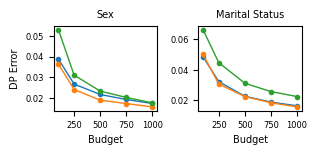

In [75]:
# plot for each agent side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2)

# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend

# Plot budget vs. error, grouped by collaboration column
for collaboration, group in agent0_df.groupby('collaboration'):
    ax1.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

    ax1.set_ylabel('DP Error')
    ax1.set_xlabel('Budget')
    
    # ax1.set_title('Age')
    ax1.set_title('Sex')

    # # set xticks at 250, 500, 750, 1000
    # ax1.set_xticks([250, 500, 750, 1000])

    # ax1.legend()

# Plot budget vs. error, grouped by collaboration column
for collaboration, group in agent1_df.groupby('collaboration'):
    ax2.plot(group['budget'], group['dp_error'], label=collaboration_map[collaboration], marker='o')

    # ax2.set_ylabel('DP Error')
    ax2.set_xlabel('Budget')
    
    # ax2.set_title('Sex')
    # ax2.set_title('African-American')
    ax2.set_title('Marital Status')
    
    # ax2.legend()

    # # set xticks at 250, 500, 750
    # ax2.set_xticks([250, 500, 750])


# set legend location outside, at the top of the plot with 2 columns
# ax2.legend(bbox_to_anchor=(1.1, 1.5), loc='upper right', ncol=3)

# add space between subplots
plt.subplots_adjust(wspace=0.4)

# save plot to file
# plot_name = 'gc_dp_error_vs_budget.pdf'
# plot_name = 'propublica_dp_error_vs_budget.pdf'
plot_name = 'folktables_dp_error_vs_budget.pdf'
# plt.savefig(f'../results/plots/{plot_name}', bbox_inches='tight', dpi=300)

In [11]:
# save the csv
# aggregated_df.to_csv('../results/plots_data/gc_2agents.csv', index=False)
# aggregated_df.to_csv('../results/plots_data/pp_2agents.csv', index=False)
# aggregated_df.to_csv('../results/plots_data/ft_2agents.csv', index=False)